# Trabajo Práctico 1 - Matrices de Insumo Producto

## Enunciado

### Consigna 1 - Analizar que sucede con la solución del sistema $p=(I-A)^{-1}d=Ld$

Esta ecuación vemos que representa una economía cerrada, ya que no aparece la demanda externa en la ecuación. Ademas, sabemos que la matriz (I-A), matriz de Leontief muestra como el cambio en demanda final modifica o afecta los valores de producción y demanda de insumos. 

(I-A) inversible $\rightarrow$ Si la matriz es singular, podemos decir que las columnas o filas son linealmente independientes, es decir que no hay un sector que sea combinacion lineal de otro. Existe unica solución (Sistema Compatible Determinado) que permite calcular el efecto total en la economía de un cambio en la demanda final. 

(I-A) inversible y d=0 $\rightarrow$ Si mi demanda interna es cero, mi produccion sera cero, ya que no tengo una demanda para satisfacer.

(I-A) no inversible $\rightarrow$ Que la matriz sea singular significa que sus columnas o filas no son linealmente independientes entre si. Esto podria indicar que algun sector o varios sectores son combinacion lineal de otros sectores, que el sistema está mal condicionado, o que algunos sectores dependen completamente de otros. Ademas, no tengo una unica solucion a mi sistema, pudiendo ser compatible indeterminado o incompatible. No se muy bien como cambia la economia con una modificacion en la demanda.

(I-A) no inversible y b=0 $\rightarrow$ Si bien no tengo una unica solucion al sistema, pudiendo ser compatible indeterminado o incompatible, podria ser cualquiera de los dos. Todos los sectores estarian inactivos porque no hay demanda final que satisfacer y ademas los sectores son dependientes entre si

### Consigna 2 -  

In [3]:
import funciones as f
import pandas as pd
import numpy as np
import scipy.linalg as sc 

---

### Consigna 5 -

- Con los datos dados, sabemos la matriz Z y el vector P

In [4]:
# Construyo Z y P
Z = pd.DataFrame({'S1':[350,50,200],'S2':[0,250,150],'S3':[0,150,550]})
P = pd.Series({'S1':1000,'S2':500,'S3':1000}) 
                  
A = f.coefTec(Z, P) # Funcion que calcula los coeficientes tecnicos 

L = np.identity(A.shape[0]) - A # Busco la matriz de Leontief
L = sc.inv(L)

print(A)
print(L)

      0    1     2
0  0.35  0.0  0.00
1  0.05  0.5  0.15
2  0.20  0.3  0.55
[[ 1.53846154 -0.         -0.        ]
 [ 0.44871795  2.5         0.83333333]
 [ 0.98290598  1.66666667  2.77777778]]


### Consigna 6 - 
Partimos del siguiente sistema que sabemos que es valido:

$$
    \left( 
    \begin{pmatrix}
    I_{n \times n} & 0_{n \times m} \\
    0_{m \times n} & I_{m \times m}
    \end{pmatrix} 
    -
    \begin{pmatrix}
    A^{rr} & A^{rs} \\
    A^{sr} & A^{ss}
    \end{pmatrix}
    \right)
    \begin{pmatrix}
    p^{r} \\
    p^{s}
    \end{pmatrix}
    =
    \begin{pmatrix}
    d^{r} \\
    d^{s}
    \end{pmatrix}
$$

\begin{equation} 
    \begin{pmatrix}
    I_{n \times n} - A^{rr} & - A^{rs} \\
    - A^{sr} & I_{m \times m} - A^{ss}
    \end{pmatrix} 
    \begin{pmatrix}
    p^{r} \\
    p^{s}
    \end{pmatrix}
    =
    \begin{pmatrix}
    d^{r} \\
    d^{s}
    \end{pmatrix}
\end{equation}

Veamos como varia la produccion($\triangle$ p) al efectuar una variacion en la demanda ($\triangle$ d)

$$
    \begin{pmatrix}
    I_{n \times n} - A^{rr} & - A^{rs} \\
    - A^{sr} & I_{m \times m} - A^{ss}
    \end{pmatrix} 
    \begin{pmatrix}
    p^{r} + \triangle p^{r} \\
    p^{s} + \triangle p^{s}
    \end{pmatrix}
    =
    \begin{pmatrix}
    d^{r} + \triangle d^{r}\\
    d^{s} + \triangle d^{s}
    \end{pmatrix}
$$   

Desarrollamos la ecuacion para obtener una expresion equivalente:

$$
    \begin{pmatrix}
    I_{n \times n} - A^{rr} & - A^{rs} \\
    - A^{sr} & I_{m \times m} - A^{ss}
    \end{pmatrix} 
    \begin{pmatrix}
    p^{r} \\
    p^{s}
    \end{pmatrix}
    +
    \begin{pmatrix}
    I_{n \times n} - A^{rr} & - A^{rs} \\
    - A^{sr} & I_{m \times m} - A^{ss}
    \end{pmatrix} 
    \begin{pmatrix}
    \triangle p^{r} \\
    \triangle p^{s}
    \end{pmatrix}
    =
    \begin{pmatrix}
    d^{r}\\
    d^{s}
    \end{pmatrix}
    +
    \begin{pmatrix}
    \triangle d^{r}\\
    \triangle d^{s}
    \end{pmatrix}
$$ 

Como sabemos que la ecuacion(1) es siempre valida, se la restamos a esta ultima expresion que conseguimos para poder simplificarla

$$
    \begin{pmatrix}
    I_{n \times n} - A^{rr} & - A^{rs} \\
    - A^{sr} & I_{m \times m} - A^{ss}
    \end{pmatrix} 
    \begin{pmatrix}
    \triangle p^{r} \\
    \triangle p^{s}
    \end{pmatrix}
    =
    \begin{pmatrix}
    \triangle d^{r}\\
    \triangle d^{s}
    \end{pmatrix}
$$ 

Recordando que en el enunciado nos dicen que tomemos $\triangle d^{s} = 0$, obtenemos entonces el siguiente sistema de ecuaciones 
$$
\left\{
\begin{array}{l}
(I - A^{rr}) \triangle p^{r} - A^{rs} \triangle p^{s} = \triangle d^{r} (1)\\
-A^{sr} p^{r} + (I - A^{ss}) \triangle p^{s} = 0 (2)
\end{array}
\right.
$$

De la ecuacion (2) despejamos $\triangle p^{s}$

$$
\triangle p^{s} = (I - A^{ss})^{-1}A^{sr} p^{r}
$$

Reemplazamos $\triangle p^{s}$ en la ecuacion (1) y despejamos $\triangle p^{r}$

$$
\begin{aligned}
(I - A^{(rr)}) \triangle p^{(r)} - A^{(rs)}(I - A^{(ss)})^{-1}A^{(sr)} \triangle p^{(r)} &= \triangle d^{(r)} \\
(I - A^{(rr)} - A^{(rs)}(I - A^{(ss)})^{-1} A^{(sr)}) \triangle p^{(r)} &= \triangle d^{(r)} \\
\triangle p^{(r)} &= (I - A^{(rr)} - A^{(rs)}(I - A^{(ss)})^{-1} A^{(sr)})^{-1} \triangle d^{(r)}
\end{aligned}
$$




---

### Consigna 7 -

- Generamos la matriz Insumo-Producto de Paraguay y Nicaragua:

In [6]:

matriz = pd.read_excel("matriz.xlsx", sheet_name ="LAC_IOT_2011",)
Nic_col = []    
Pry_col = []
for i in range(1,41): #Crea la lista de columnas a filtrar
    Nic_col.append('NICs'+str(i))
    Pry_col.append('PRYs'+str(i))
    
Pry = matriz[matriz["Country_iso3"] == "PRY"] # Crea la tabla con filas de PRY
Nic = matriz[matriz["Country_iso3"] == "NIC"] # Crea la tabla con filas de NIC


# Crea matrices intra-regionales
Pry_int= Pry.loc[:,Pry_col] 
Nic_int = Nic.loc[:,Nic_col] 

#Crea matrices intre-regionales
Nic_ext = Nic.loc[:,Pry_col] 
Pry_ext = Pry.loc[:,Nic_col]

#Columna con los nombres de los sectores para despues mantener los indices
colnames = pd.DataFrame({'Sectores':Pry_col + Nic_col})
colnamesPry = pd.DataFrame({'Sectores':Pry_col})
colnamesNic = pd.DataFrame({'Sectores':Nic_col})
# Se cambian los indices a los nombres del sector
Pry_int.index = colnamesPry['Sectores']
Nic_int.index = colnamesNic['Sectores']
Nic_ext.index = colnamesNic['Sectores']
Pry_ext.index = colnamesPry['Sectores']

#Concateno las submatrices para crear mi A
A_Pry = pd.concat([Pry_int,Nic_ext])
A_Nic = pd.concat([Pry_ext,Nic_int])
A = pd.concat([A_Pry,A_Nic], axis=1)

print(A)


ImportError: Missing optional dependency 'openpyxl'.  Use pip or conda to install openpyxl.

- Calculamos los coeficientes tecnicos para cada bloque:

In [9]:
#Creo los vectores de produccion total para luego usar como P en la formula A = ZP^(-1)
Pry_out = Pry["Output"]
Pry_out = Pry_out.replace(0,1) #remplazo 0 por 1
Nic_out = Nic["Output"]
Nic_out = Nic_out.replace(0,1) #remplazo 0 por 1

#Coef intra-regionales
cT_NxN = f.coefTec (Nic_int,Nic_out)
cT_PxP = f.coefTec (Pry_int,Pry_out)

#Coef intre-regionales
cT_NxP = f.coefTec (Nic_int,Pry_out)
cT_PxN = f.coefTec (Pry_int,Nic_out)


- Simulacion de shock:

<Axes: title={'center': 'Comparación de demanda'}, xlabel='Sectores'>

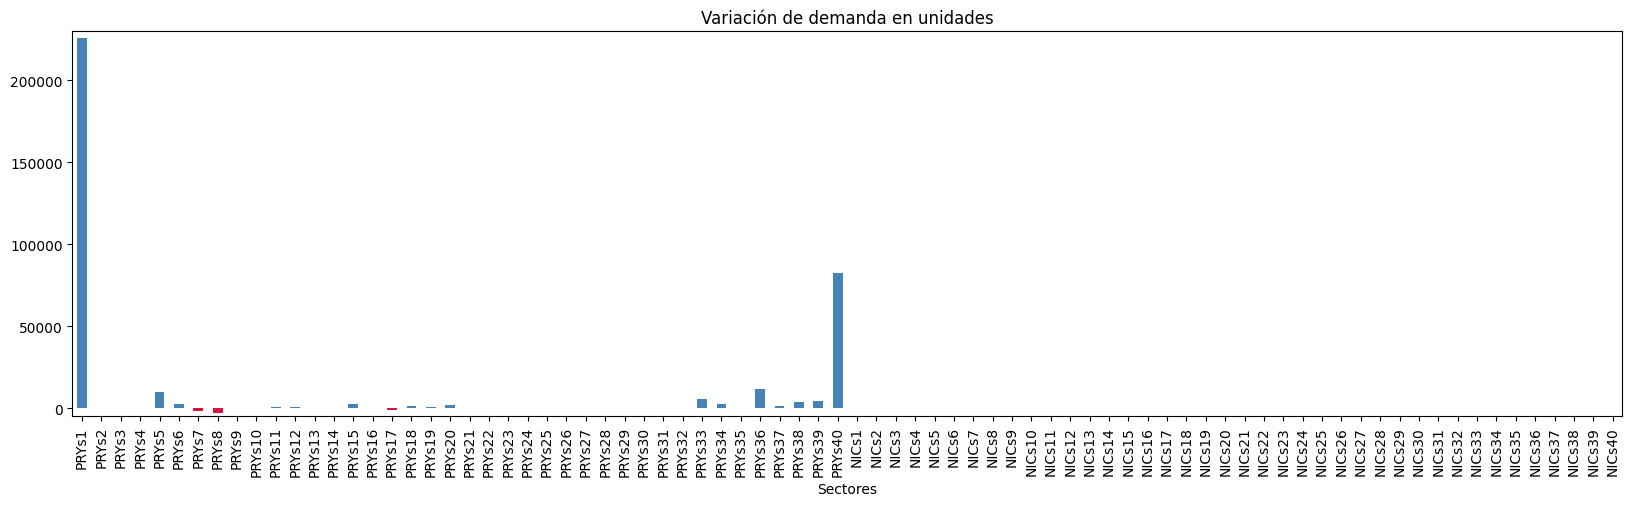

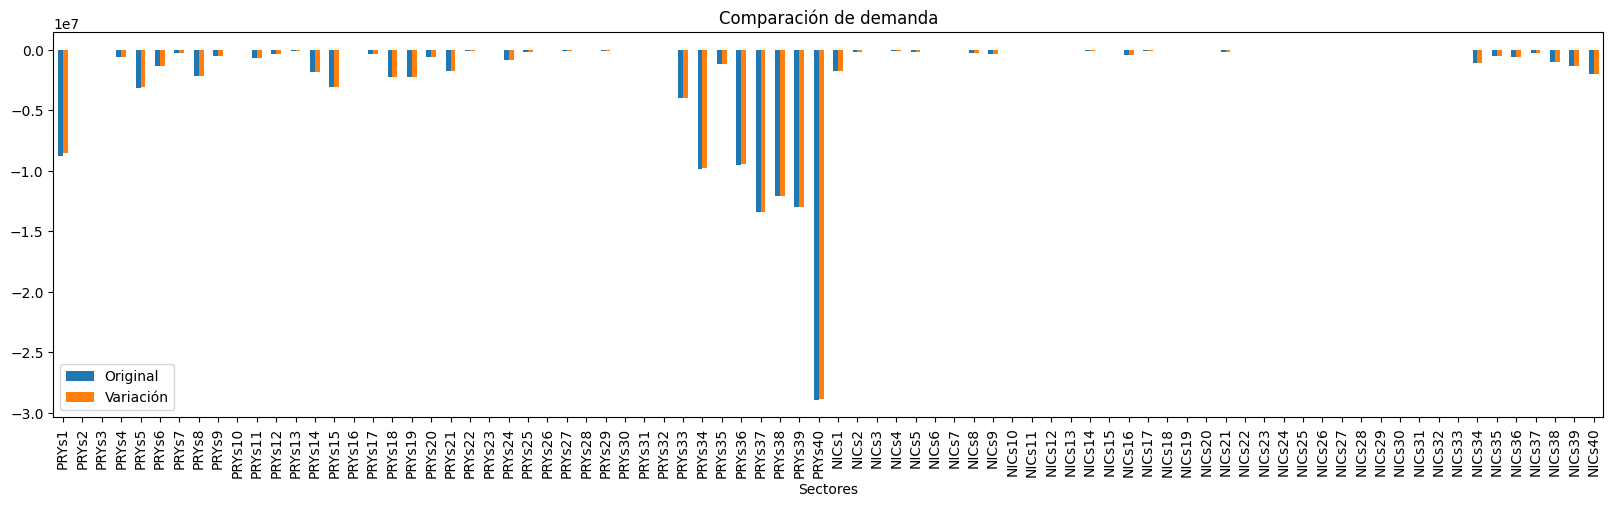

In [17]:
P1 = pd.concat([Pry_out,Nic_out]) #Vector P
P1.index = colnames['Sectores']

P2 = P1.copy() #Vector P2 con las variaciones del shock aplicadas
P2['PRYs5'] = P2['PRYs5']*0.9
P2['PRYs6'] = P2['PRYs6']*1.033
P2['PRYs7'] = P2['PRYs7']*1.033
P2['PRYs8'] = P2['PRYs8']*1.033

D1 = f.Leont2Reg(A,P1) # Demanda para las dos regiones originales
D2 = f.Leont2Reg(A,P2) # Demanda para las dos regiones con los shocks aplicados
Delta_Demanda = D2 - D1 # Diferencia de la demanda

df = pd.DataFrame({'Original':D1,'Variación':D2},index = colnames['Sectores'])
Delta_Demanda.plot.bar(rot = 90,title ='Variación de demanda en unidades',ylim=(-5000,230000),
                       color=np.where(Delta_Demanda<0,'crimson','steelblue'),figsize=(20, 5))
df.plot.bar(rot = 90,title ='Comparación de demanda',figsize=(20, 5))